In [8]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Stock Market Data**

We are using Python’s built-in Yahoo Finance function (yfinance) to pull historical stock market data and storing it in a dataframe.

In [5]:
# Store data in df
sp500 = yf.Ticker("^GSPC")
data = sp500.history(start="1980-01-01")

In [6]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-01-02 00:00:00-05:00,0.0,108.430000,105.290001,105.760002,40610000,0.0,0.0
1980-01-03 00:00:00-05:00,0.0,106.080002,103.260002,105.220001,50480000,0.0,0.0
1980-01-04 00:00:00-05:00,0.0,107.080002,105.089996,106.519997,39130000,0.0,0.0
1980-01-07 00:00:00-05:00,0.0,107.800003,105.800003,106.809998,44500000,0.0,0.0
1980-01-08 00:00:00-05:00,0.0,109.290001,106.290001,108.949997,53390000,0.0,0.0


## **EDA**

In this section, we check for potential data issues (missingness, imbalance, scaling).

In [9]:
# Check for missingness
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64



Time intervals between rows:
Date
1 days 00:00:00    8862
2 days 00:00:00     103
2 days 23:00:00      41
3 days 00:00:00    1969
3 days 01:00:00      44
3 days 23:00:00       4
4 days 00:00:00     278
5 days 00:00:00       2
7 days 00:00:00       1
Name: count, dtype: int64


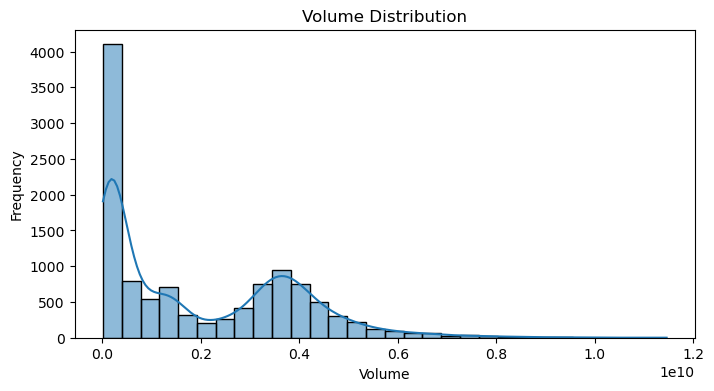

In [14]:
# Check for imbalance

# Evenly spaced time intervals?
data.index = pd.to_datetime(data.index)
time_diff = data.index.to_series().diff().value_counts().sort_index()
print("\nTime intervals between rows:")
print(time_diff)

# Seasonal trends?
plt.figure(figsize=(8, 4))
sns.histplot(data['Volume'], bins=30, kde=True)
plt.title("Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

SUMMARY STATS


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,11305.000000,11305.000000,11305.000000,11305.000000,1.130500e+04,11305.0,11305.0
mean,1337.724650,1351.816465,1335.662569,1344.271859,1.960301e+09,0.0,0.0
std,1245.801154,1245.744916,1232.478066,1239.500037,1.903583e+09,0.0,0.0
min,0.000000,99.580002,94.230003,98.220001,1.499000e+07,0.0,0.0
25%,369.059998,371.309998,367.049988,369.329987,1.893000e+08,0.0,0.0
50%,1109.550049,1116.790039,1103.209961,1109.640015,1.278800e+09,0.0,0.0
75%,1677.910034,1684.510010,1671.839966,1678.660034,3.588900e+09,0.0,0.0
max,5875.620117,5878.459961,5846.109863,5864.669922,1.145623e+10,0.0,0.0


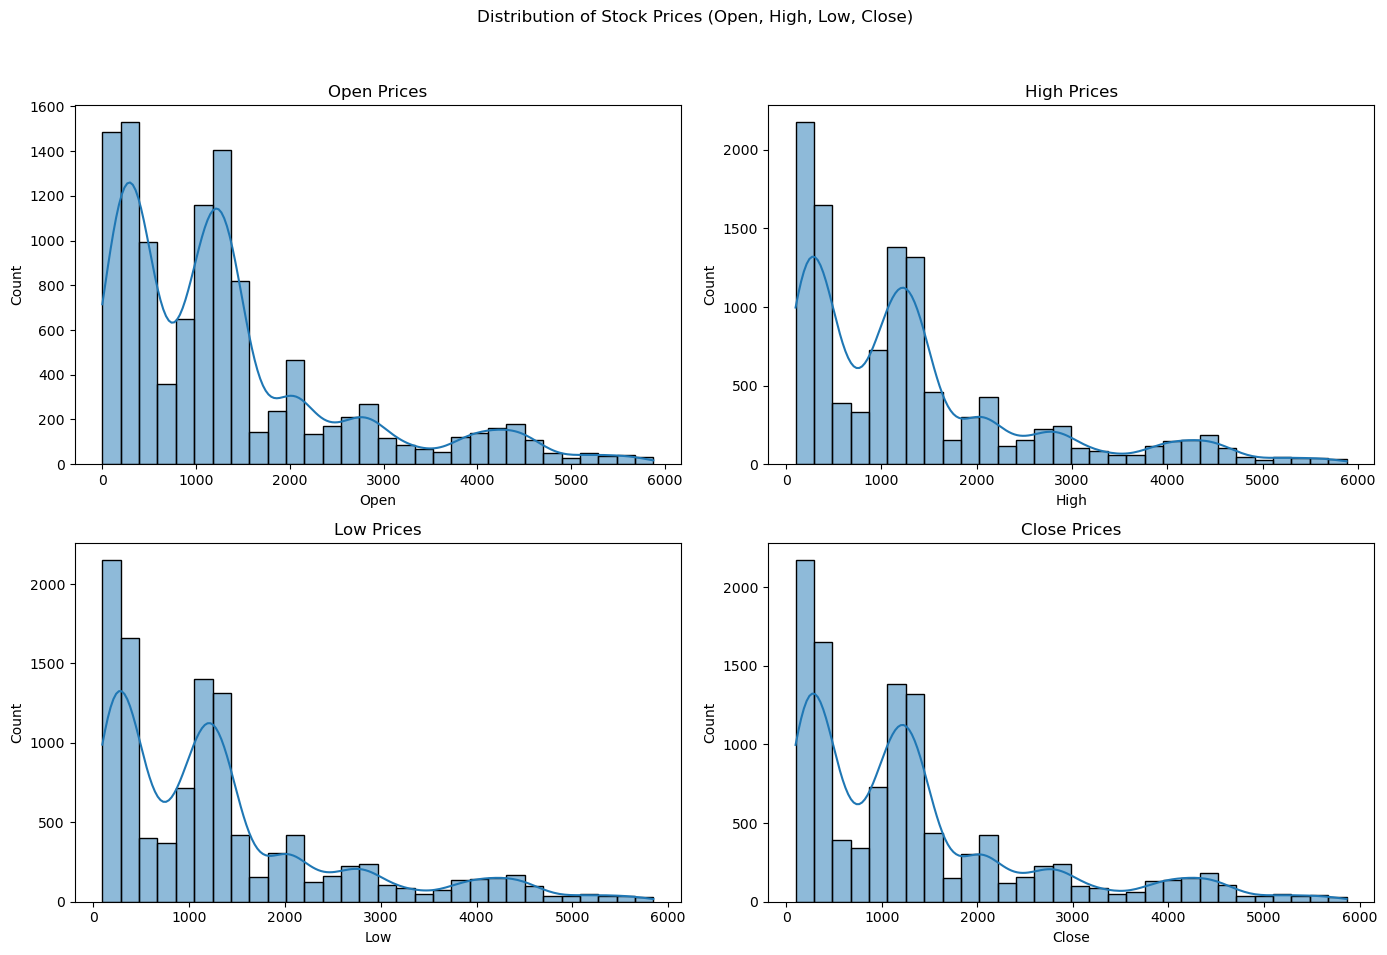

In [12]:
# Assess scaling
print("SUMMARY STATS")
display(data.describe())

# Plotting the distributions for Open, High, Low, Close
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Stock Prices (Open, High, Low, Close)")

sns.histplot(data['Open'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Open Prices')

sns.histplot(data['High'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('High Prices')

sns.histplot(data['Low'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Low Prices')

sns.histplot(data['Close'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Close Prices')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
